# Section 1 -  Setup

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression

## Import Dataset

In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

#basic integrity check
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
#look at tail as well
data.tail()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

## Data Inspection

In [5]:
#datatypes
print ('\n\n**Datatypes\n')
data.info();

#statistical summary
print ('\n\n**Statistical Summary\n',data.describe())

#shape
print ('\n\n**Shape =',data.shape)

#null values
print ('\n\n**Null Items =', data.isnull().sum().sum())



**Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Statistical Summary
                 

In [6]:
#any duplicated rows?
data[data.duplicated()]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

### *Imputation handled below in EDA section

# Section 2 - EDA

## Study the data distribution in each attribute and target variable

In [7]:
# Unique Values Per Column
print ('\n**Number of unique items in each column')
data.nunique()


**Number of unique items in each column


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
# Number of people with zero mortgage
mort0 = data[data['Mortgage'] == 0]
print('**Number of people with zero mortgage =', mort0['Mortgage'].count())

**Number of people with zero mortgage = 3462


In [9]:
# Number of people with zero credit spending
ccavg0 = data[data['CCAvg'] == 0]
print('**Number of people with zero credit card spending =', ccavg0['CCAvg'].count())

**Number of people with zero credit card spending = 106


In [10]:
#provide value counts for all categorical columns
print ('**Value Counts of Categorical Data')
columns = ['Education', 'Family', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for column in columns:
     print("\n" + column)
     print(data[column].value_counts())


**Value Counts of Categorical Data

Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

CD Account
0    4698
1     302
Name: CD Account, dtype: int64

Online
1    2984
0    2016
Name: Online, dtype: int64

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


### Imputation Check

In [11]:
# I can see a negative number in the minimum value of 'Experience', investigating...
print (data.Experience[data['Experience'] < 0].count())

52


In [12]:
#There are many negative values for experience. Must impute
#clamping negative values to zero
data.loc[data.Experience < 0, 'Experience'] = 0

print (data.Experience[data['Experience'] < 0].count())

0


In [13]:
# Seeing a 4 digit value in ZIP code min value
data[data['ZIP Code'] < 10000]


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1

In [14]:
#Googled zip codes and value (9307) is not valid

#also determined there are 467 unique zip codes, and given that will add too many columns if used as part of classification,
#and not add much value to prediction, will be removing from computation in a seperate step below...

## Univariate Analysis

### Histograms

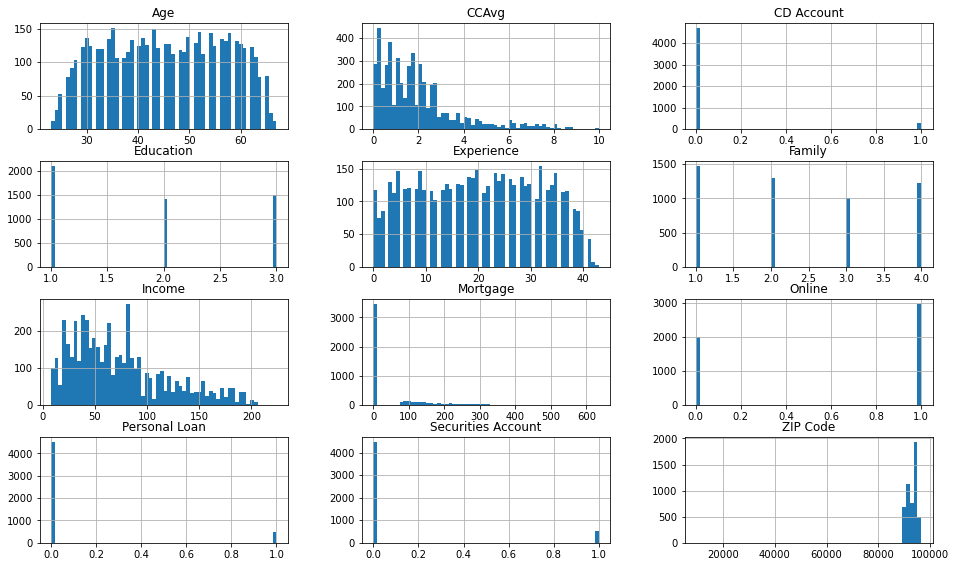

In [15]:
col = list(data)[1:-1]
data[col].hist(stacked=False, bins=60, figsize=(16,40), layout=(16,3));

## Bivariate Analysis
### Correlation Heatmap

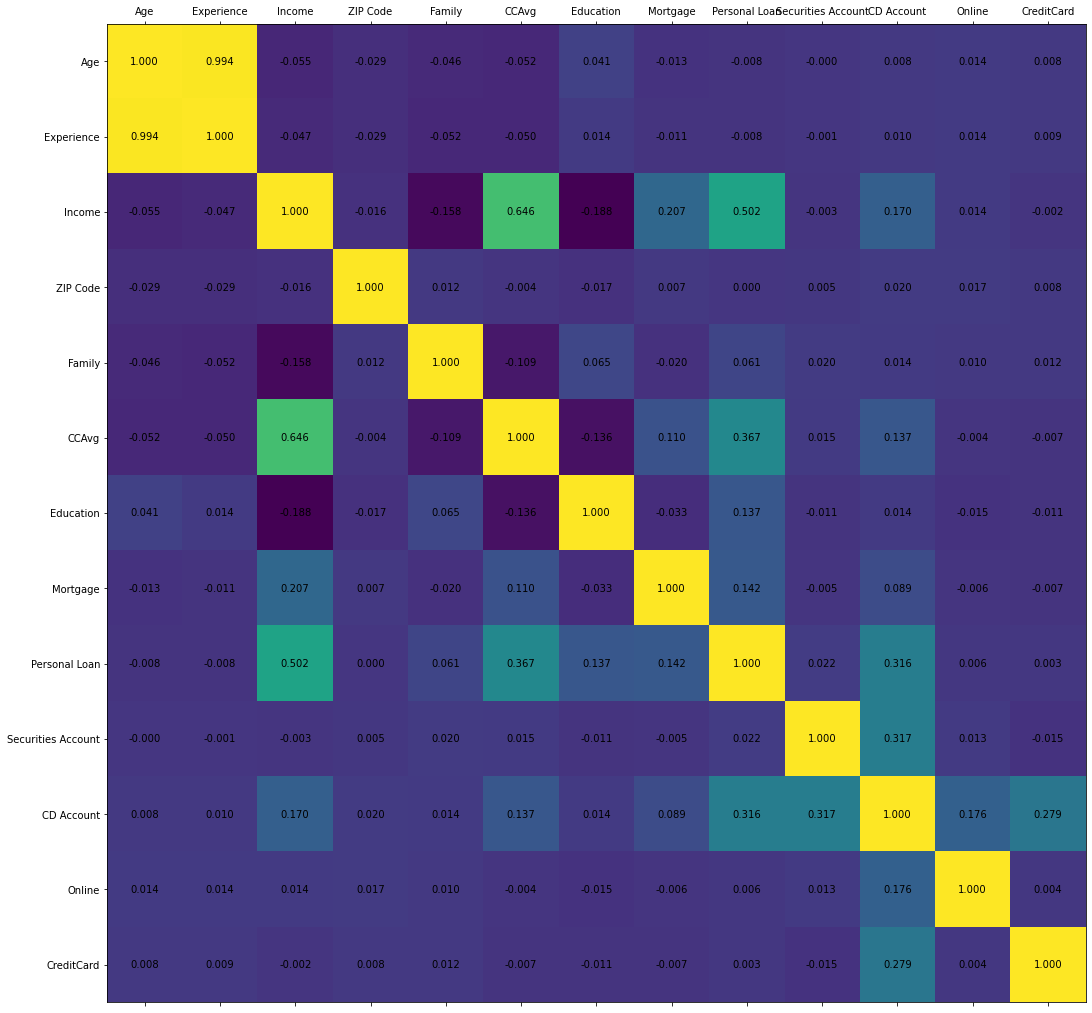

In [16]:
#remove ID column
df = data.drop('ID', axis = 1)

#plot correlation with heatmap for easy visualization
corr = df.corr()
fig,ax = plt.subplots(figsize=(18, 18))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

### Pairplots

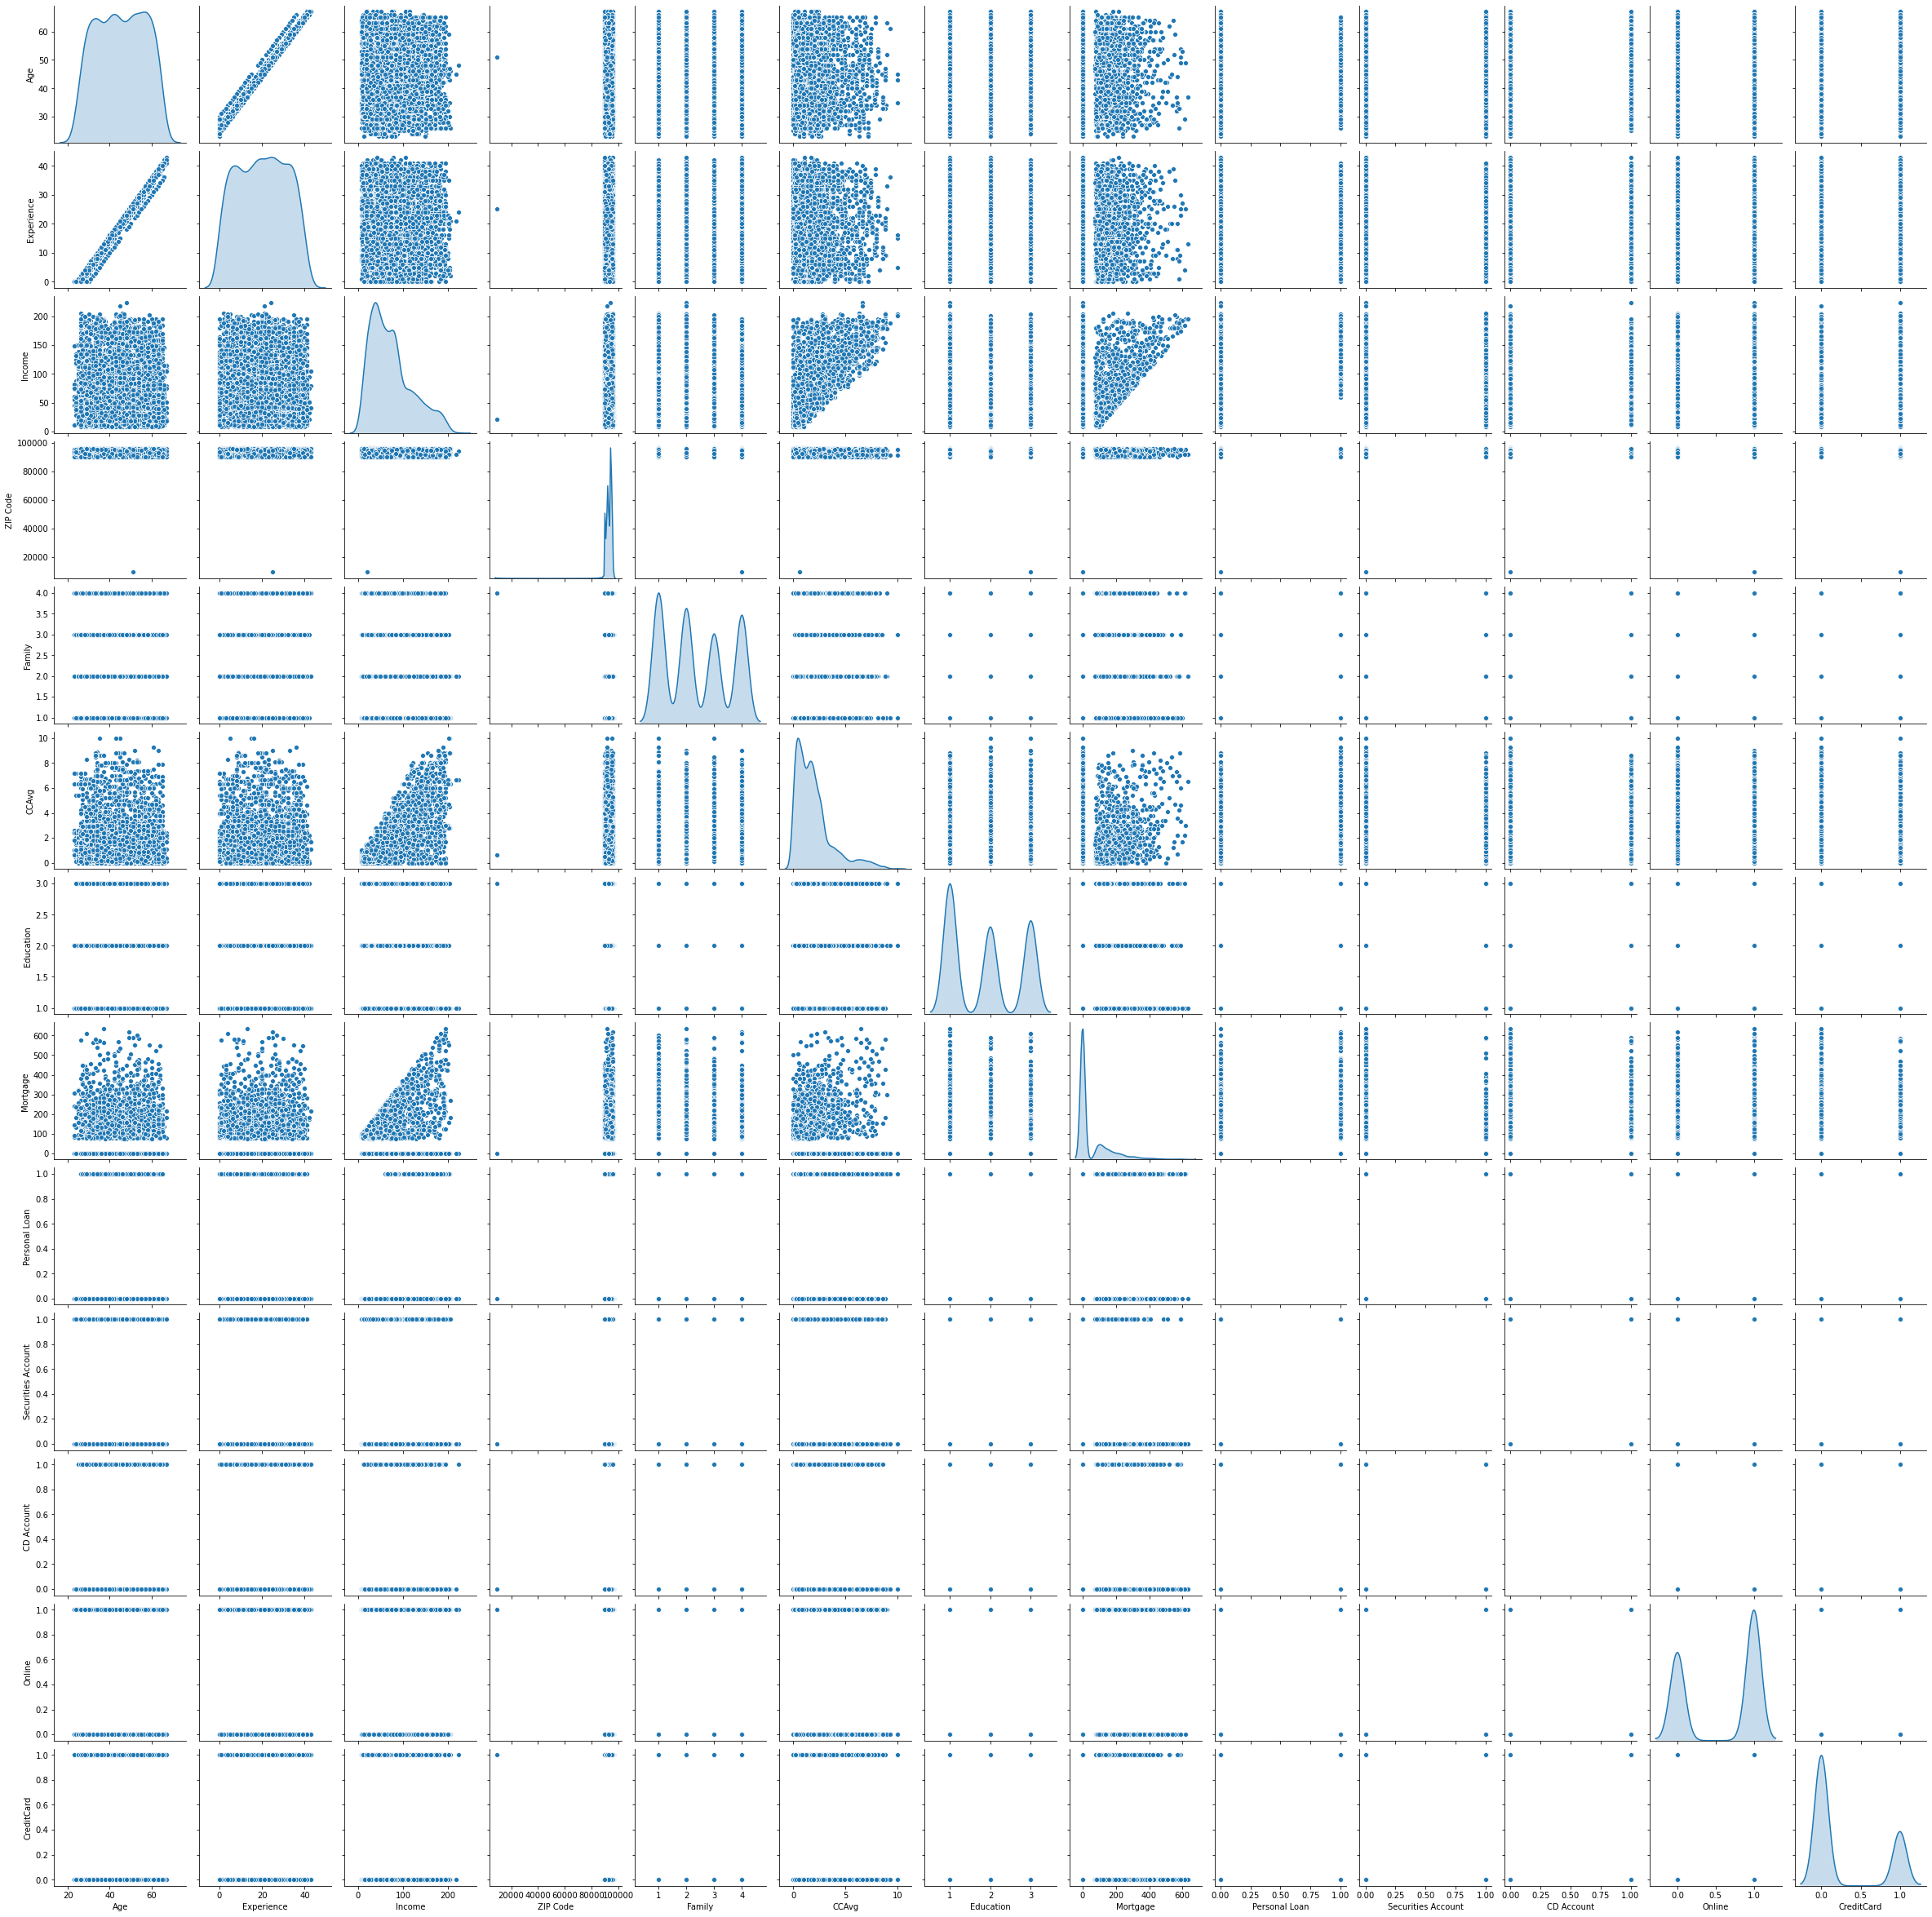

In [17]:
#provide bivariate plots
sns.pairplot(df,diag_kind='kde');

## Get Model Data Ready

In [18]:
#remove columns which dont add to prediction quality
#zip code is numeric but is categorical in nature. There are 400+ unique values and would add too much complexity
df.drop(['ZIP Code'], axis = 1, inplace=True)
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [19]:
#drop dependent variable column since we will use this set for test/train
test = df.drop('Personal Loan',axis=1)

#change numeric categorical information into dummy columns
test['Family'] = test['Family'].astype('category')
test['Education'] = test['Education'].astype('category')
test['Securities Account'] = test['Securities Account'].astype('category')
test['CD Account'] = test['CD Account'].astype('category')
test['Online'] = test['Online'].astype('category')
test['CreditCard'] = test['CreditCard'].astype('category')

test = pd.get_dummies(test, drop_first=True)
test.head()

Age  Experience  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  \
0   25           1      49    1.6         0         0         0         1   
1   45          19      34    1.5         0         0         1         0   
2   39          15      11    1.0         0         0         0         0   
3   35           9     100    2.7         0         0         0         0   
4   35           8      45    1.0         0         0         0         1   

   Education_2  Education_3  Securities Account_1  CD Account_1  Online_1  \
0            0            0                     1             0         0   
1            0            0                     1             0         0   
2            0            0                     0             0         0   
3            1            0                     0             0         0   
4            1            0                     0             0         0   

   CreditCard_1  
0             0  
1             0  
2             0  
3             0  
4             1

# Section 3- 
## Split Data Into Training / Testing Sets

In [20]:
#use prepared data which has dependent variable removed
X = test.copy()

#get dependent variable by itself
y = df['Personal Loan']

#split 70/30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#sanity check
x_train.head()

Age  Experience  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  \
717    59          34      94    0.5         0         0         1         0   
2496   63          37      32    0.7       141         0         1         0   
2469   43          18      89    0.1       307         0         0         0   
1375   50          26     179    2.9         0         0         0         0   
2742   39          14      89    0.4         0         1         0         0   

      Education_2  Education_3  Securities Account_1  CD Account_1  Online_1  \
717             0            0                     0             0         0   
2496            1            0                     0             0         0   
2469            1            0                     0             0         0   
1375            0            1                     0             0         0   
2742            0            0                     0             0         1   

      CreditCard_1  
717              1  
2496             0  
2469             1  
1375             1  
2742             0

In [21]:
#verify the random split is correct
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [22]:
#evaluate the split quality
print("Original PL True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("Original PL False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("\nTraining PL True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PL False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("\nTest PL True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original PL True Values    : 480 (9.60%)
Original PL False Values   : 4520 (90.40%)

Training PL True Values    : 342 (9.77%)
Training PL False Values   : 3158 (90.23%)

Test PL True Values        : 138 (9.20%)
Test PL False Values       : 1362 (90.80%)


# Section 4- Logistic Regression Modeling
## Use model to predict whether the customer will take a personal loan or not. 

In [23]:
#try different solvers to see which is most relevant
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for solve in solver_list: 

    # Fit the model on train
    model = LogisticRegression(solver=solve, C=0.5, random_state=10)
    model.fit(x_train, y_train)

    #predict on test
    y_predict = model.predict(x_test)
    
    print("*",solve)
    print("Training Accuracy",model.score(x_train,y_train))  
    print("Testing Accuracy",model.score(x_test, y_test))
    print("Recall:",recall_score(y_test,y_predict))
    print("Precision:",precision_score(y_test,y_predict))
    print("F1 Score:",f1_score(y_test,y_predict))
    print("ROC-AUC Score:",roc_auc_score(y_test,y_predict))
    print ()


* liblinear
Training Accuracy 0.9582857142857143
Testing Accuracy 0.9626666666666667
Recall: 0.6666666666666666
Precision: 0.9019607843137255
F1 Score: 0.7666666666666666
ROC-AUC Score: 0.8296622613803231

* newton-cg
Training Accuracy 0.9574285714285714
Testing Accuracy 0.964
Recall: 0.6594202898550725
Precision: 0.9285714285714286
F1 Score: 0.7711864406779662
ROC-AUC Score: 0.8271403945604291

* lbfgs
Training Accuracy 0.9585714285714285
Testing Accuracy 0.9633333333333334
Recall: 0.6594202898550725
Precision: 0.9191919191919192
F1 Score: 0.7679324894514767
ROC-AUC Score: 0.826773287365128

* sag
Training Accuracy 0.9014285714285715
Testing Accuracy 0.9113333333333333
Recall: 0.2753623188405797
Precision: 0.5352112676056338
F1 Score: 0.3636363636363636
ROC-AUC Score: 0.625566621975356

* saga
Training Accuracy 0.9028571428571428
Testing Accuracy 0.914
Recall: 0.26811594202898553
Precision: 0.5692307692307692
F1 Score: 0.3645320197044335
ROC-AUC Score: 0.6237789695460639



In [24]:
# Fit the best model on train
model = LogisticRegression(solver='newton-cg', C=0.5, random_state=10)
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)

### Confusion Matrix

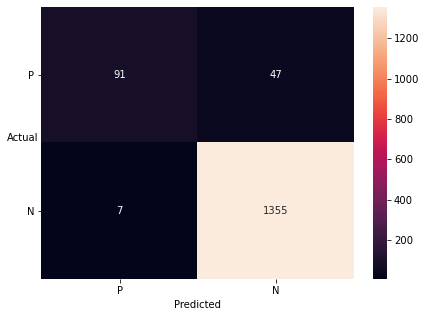

In [25]:
#create confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
ay=sns.heatmap(df_cm, annot=True, fmt='d',xticklabels = ['P','N'] , yticklabels = ['P','N'])
plt.ylabel('Actual', rotation=0)
plt.xlabel('Predicted')
ay.set_yticklabels(ay.get_yticklabels(), rotation=0)
plt.show()

### ROC-AUC Curve

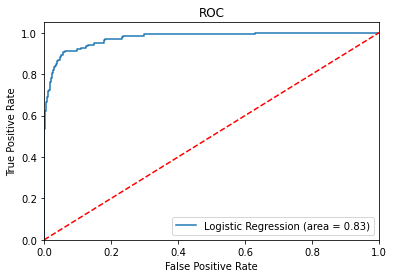

In [26]:
#Display ROC-AUC Curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Section 5 - Results Observations
## Coefficients

In [27]:
coeffs = pd.DataFrame()
coeffs['Column Name'] = x_train.columns
coeffs['Coeff'] = np.round(abs(model.coef_[0]),3)
coeffs.sort_values(by='Coeff',ascending=False)

Column Name  Coeff
9            Education_3  3.051
8            Education_2  2.856
11          CD Account_1  2.482
6               Family_3  1.584
7               Family_4  1.507
13          CreditCard_1  0.642
12              Online_1  0.446
10  Securities Account_1  0.315
5               Family_2  0.228
3                  CCAvg  0.171
2                 Income  0.052
1             Experience  0.025
0                    Age  0.018
4               Mortgage  0.001

## Rows where Observed and Predicted Differed

In [28]:
z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z=z[z['Observed Loan Status'] != z['Predicted Loan Status']]
print ('**Total number of mispredictions from test set = ',len(z),'/',len(y_predict))
z

**Total number of mispredictions from test set =  54 / 1500


Age  Experience  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  \
4575   53          27     115   0.50         0         1         0         0   
78     54          30     133   2.60         0         1         0         0   
3383   46          22     135   4.10       213         0         1         0   
459    35          10     200   3.00       458         1         0         0   
2304   27           2     170   4.70         0         0         1         0   
1731   43          19     125   2.40         0         0         1         0   
2996   42          18     103   3.33         0         0         0         0   
3983   39          13      93   3.60         0         0         0         1   
1793   35           9     113   0.80         0         0         1         0   
3612   50          25      99   4.60       368         0         0         0   
183    29           3     148   4.10         0         0         1         0   
737    64          37     138   2.80         0         1         0         0   
915    53          28     184   8.10       303         0         0         0   
2345   65          40      89   4.10       299         0         0         0   
4702   35           5     108   2.75         0         1         0         0   
4593   54          30     133   5.00         0         0         0         0   
650    47          22     122   5.10       163         0         0         0   
1062   47          21      83   3.80        97         0         0         0   
1674   37          11     139   0.80       421         1         0         0   
4705   61          37     141   0.70         0         0         1         0   
1328   60          36     145   6.90       380         0         0         1   
3757   45          21     142   1.40         0         0         0         0   
3033   43          19     130   4.70       221         1         0         0   
4151   44          18     123   5.90         0         0         1         0   
2623   42          17     111   3.00         0         0         1         0   
932    51          27     112   1.80         0         0         1         0   
4225   43          18     204   8.80         0         1         0         0   
3858   42          18     158   0.40       277         1         0         0   
2691   61          36     119   5.40         0         1         0         0   
3959   43          19     123   1.30         0         0         1         0   
1632   31           5      93   3.10         0         1         0         0   
1166   30           5     112   5.00         0         0         0         1   
4179   29           3      91   3.40         0         0         0         0   
785    46          22     164   7.60         0         1         0         0   
3988   59          35      85   3.40         0         0         0         0   
1143   33           7     120   3.20         0         0         0         0   
740    52          27     195   8.10         0         0         0         0   
3784   30           6     115   3.80         0         0         0         1   
951    59          34      83   3.40         0         1         0         0   
4418   59          34     145   1.80       198         0         0         1   
2586   47          23     149   6.10         0         0         0         1   
891    32           6     120   5.40       301         0         0         1   
1195   32           7     123   2.90         0         1         0         0   
3478   31           6     133   1.50         0         0         0         0   
3992   47          22      95   3.90         0         1         0         0   
2001   44          17     128   3.25         0         1         0         0   
2536   51          25     104   4.20         0         0         0         0   
2391   39          12     138   4.67         0         0         0         0   
3456   46          22     125   4.70         0         1         0         0   
2194  

# Section 6 - Business Insights
## Data Preparation Details:
- Invalid (negative) values were imputed to zeroes as part of the data preparation.
- The ZIP Codes were removed from the data for prediction due to the model complexity to value ratio.
- All 5 Logistic Regression solvers were compared to choose the best one for analysis. Solver variable were adjusted as well.

## Confusion Matrix Description:
- True Positive (actual=P, predicted=P):
    * Predicted the customer would take a personal loan and did.


- False Positive (actual=N, predicted=P):
    * Predicted the customer would take a personal loan but did not.


- True Negative (actual=N, predicted=N):
    * Predicted the customer wouldn't take a personal loan and did not.


- False Negative (actual=P, predicted=N):
    * Predicted the customer wouldn't take a personal loan but did.


## Important Data Features:
- The customers education level, whether they had a CD Account, their family size, and having a credit card were the largest factors (based on model coefficients) in prediction. Specifically, the 2 highest education levels and family sizes, plus having a CD Account were the largest factors.
    
- Conversely, Income, Age, Job Experience, and whether the customer had a mortgage contributed the least to the prediction.


## Important Metric:
- The bank wants to understand the likelihood of liability customers obtaining personal loans so it can market to them using a minimal budget approach. In this case, the False Positives and False Negatives need only to be minimized so as to reduce overall costs as much as possible. These prediction errors are of a type that is not as costly as say loan defaults might be...

- The chosen model (newton-cg) provided the following metrics:
    * Training Accuracy 0.9574285714285714
    * Testing Accuracy 0.964
    * Recall: 0.6594202898550725
    * Precision: 0.9285714285714286
    * F1 Score: 0.7711864406779662
    * ROC-AUC Score: 0.8271403945604291
    
- After reaching the desired accuracy, the model can be deployed to better predict what segment of customers to market to for personal loans to achieve the desired targets.




In [32]:
!jupyter nbconvert --to html project2a.ipynb

[NbConvertApp] Converting notebook project2a.ipynb to html
[NbConvertApp] Writing 1713434 bytes to project2a.html
